## Eploratory Data Analysis 
- jeu de donnée : tinanic dataset 


### Importation des packages 

In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

### Chargement du jeu de donnée

In [55]:
data = sns.load_dataset("titanic")
df = data.copy()

#### Analyse de forme :

- Identifier votre target (qui depend de la nuture  des données bien sure) : 
    - le target du jeu de donnée est `survived`

<br/> 

- Determiner le nombre de lignes et de colones : 
    - Il y'a 891 passager le bateau du titanic 
    - le nombre de colones est 15 

<br/> 

- Quelles sont les types de variales qui composent le dataset : 
    - object : `5`
    - int64  :  `4`
    - float64 :      `2`
    - bool  :     `2`
    - category : `2`


<br/> 

- Determiner les valeurs manquantes : 
    - la variable `deck` posséde 77 % de valeurs manquantes (à supprimer car si on impute on conromp le sdonnées) 
    - par contre pour la variable age je peux soit supprimer les lignes oun faire imputation 


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
nrow , ncol = df.shape 

print(f"le nombre de lignes est : {nrow}")
print(f"le nombre de colones  est : {ncol}")

le nombre de lignes est : 891
le nombre de colones  est : 15


In [19]:
df.dtypes.value_counts()

object      5
int64       4
float64     2
bool        2
category    1
category    1
dtype: int64

In [48]:
missing_value = df.isnull().sum() / nrow
missing_value.sort_values()

survived       0.000000
pclass         0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
embarked       0.002245
embark_town    0.002245
age            0.198653
deck           0.772166
dtype: float64

<AxesSubplot:>

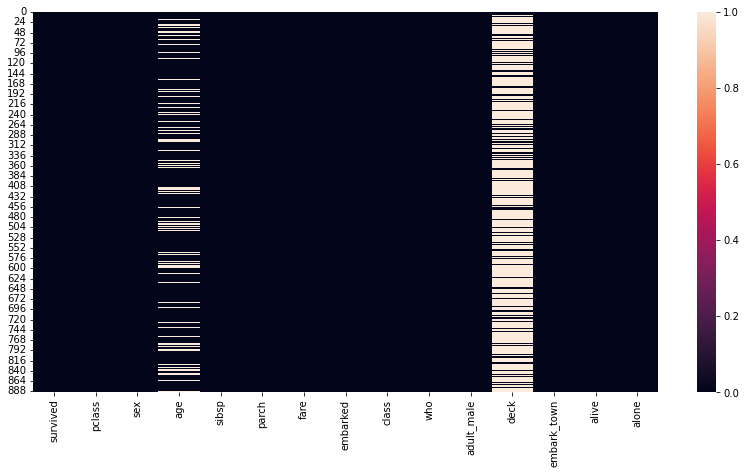

In [60]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull())

#### Analyse de fond  :

- Faire une visulation du target 
     - Les classes ne sont pas désiquilibrées 
     
<br/> 

- Faire une documentation sur les variables 

<br/> 

- Faire une visulation entre variable esxplicatives / target 
     - visualisation variable explicative :
          - il semblerait que la variable age  suit une distribution normale(a tester)
  

<br/> 

- Identification des outliers 
     - pas de données aberrante pour la variable age distribution
     - par contre la variable fare ca reste a tester 

0    0.616162
1    0.383838
Name: survived, dtype: float64

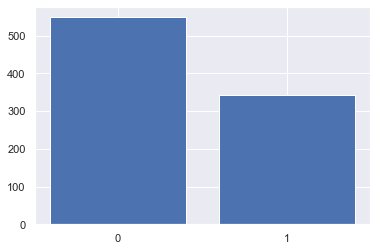

In [89]:

# Tracer avec seaborn 
height = list(df.loc[:, "survived"].value_counts())
labels = list(df.loc[:, "survived"].unique())
labels = [ str(i) for i in labels ]
plt.bar(labels, height) 


<AxesSubplot:xlabel='survived', ylabel='count'>

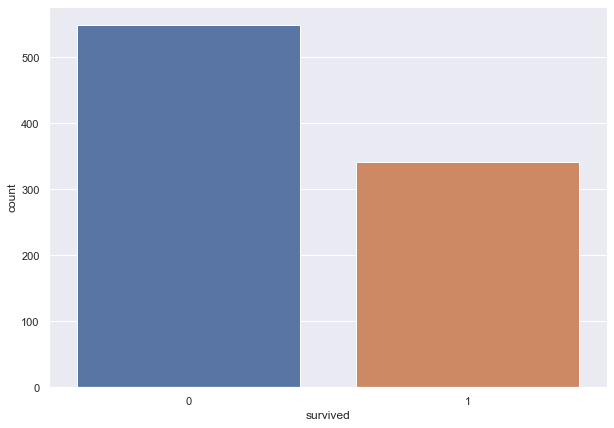

In [87]:
# tracer avec seaborn 

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.countplot(x="survived", data=df)

####  Visualisation des variables continues 

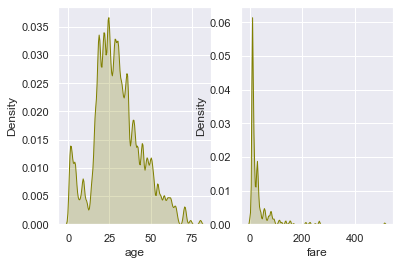

In [107]:
n = len(df.select_dtypes(include= [float]).columns )
plt.figure()
for num, colone in enumerate(df.select_dtypes(include= [float]).columns): 
    sns.set(style="darkgrid")
# Narrower bandwidth
    plt.subplot(1,n, num+1)
    sns.kdeplot(df[colone], shade=True, bw_method=0.05, color='olive') # if using seaborn < 0.11.0


####  Visualisation des variables discret 

In [128]:
def plot_variable_discret(df):
    df_discret = df.select_dtypes(include= [int, object]).iloc[:,1:]
    n = len(df_discret.columns)
    plt.figure(figsize=(14,8))
    for num,colone in enumerate(df_discret.columns):
        plt.subplot(2,n//2, num+1)
        sns.countplot(x=colone, data=df)
    
    plt.show( )


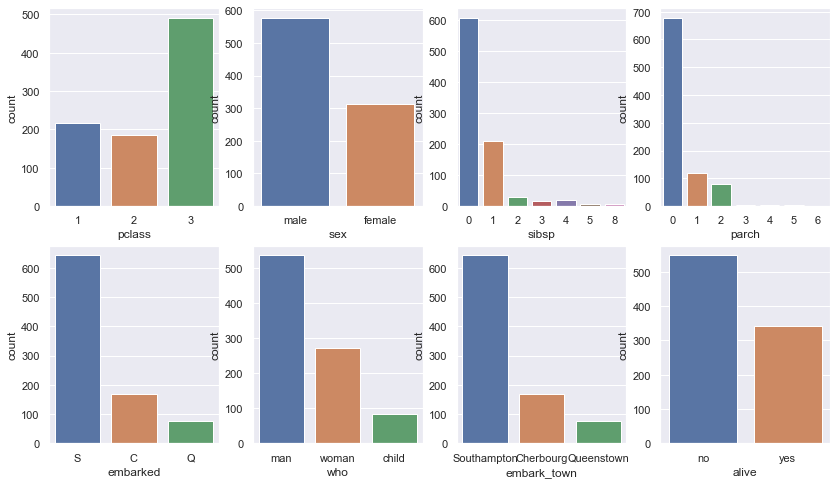

In [129]:
plot_variable_discret(df)

### Visualisation entre variable continue et target 

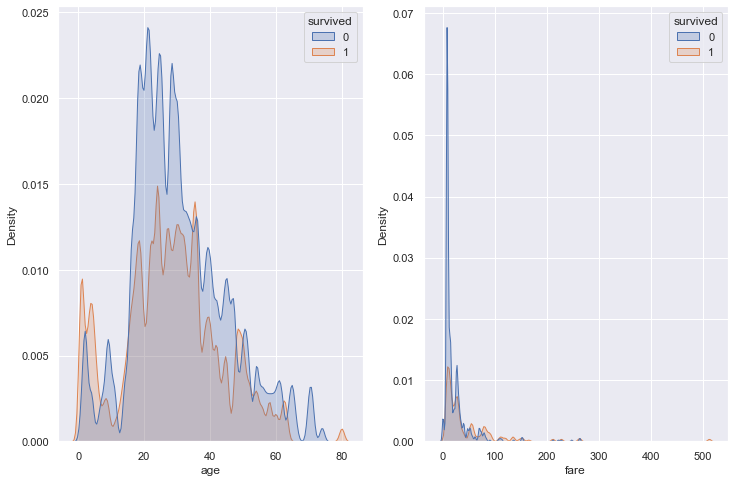

In [122]:
n = len(df.select_dtypes(include= [float]).columns )
plt.figure(figsize=(12, 8))
for num, colone in enumerate(df.select_dtypes(include= [float]).columns): 
    sns.set(style="darkgrid")
# Narrower bandwidth
    plt.subplot(1,n, num+1)
    sns.kdeplot(df[colone],hue=df["survived"],  shade=True, bw_method=0.05, color='olive') # if using seaborn < 0.11.0

### Visualisation entre variable discret  et target

In [177]:
def plot_variable_discret_bis(df):
    df_discret = df.select_dtypes(include= [int, object]).iloc[:,1:]
    n = len(df_discret.columns)
    plt.figure(figsize=(18,8))
    for num,colone in enumerate(df_discret.columns):
        plt.subplot(2,n//2, num+1)
        sns.barplot(
        x= colone , 
        y="survived", 
        data= df , 
        estimator= np.mean  , 
        ci=None, 
        color='#69b3a2')
    
    plt.show( )
 

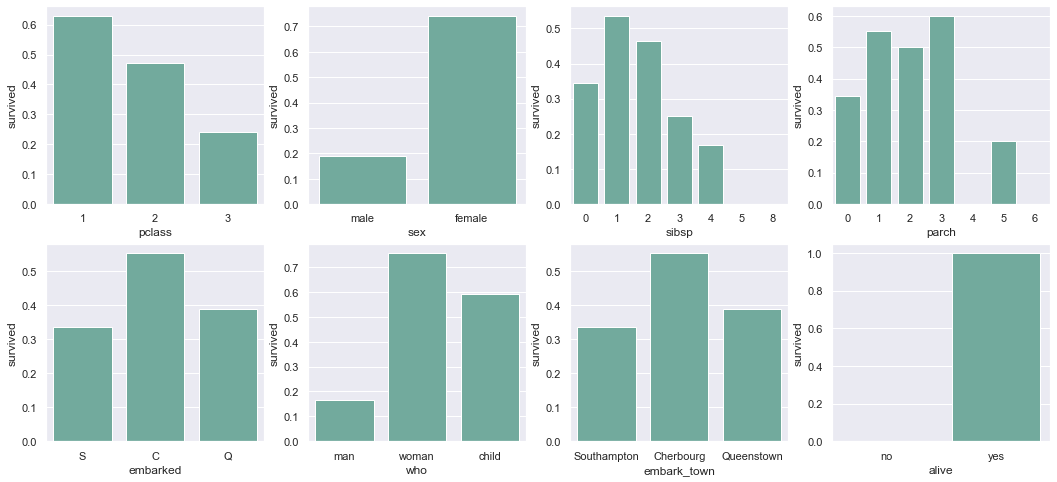

In [178]:
plot_variable_discret_bis(df)

## Detection des outliers 

In [201]:
def plot_outliers(df): 
    n = len(df.select_dtypes(include= [float]).columns )
    plt.figure(figsize=(10, 5))
    for num, colone in enumerate(df.select_dtypes(include= [float]).columns): 
        sns.set(style="darkgrid")
        plt.subplot(1,n, num+1)
        sns.boxplot(y=colone , data=df )

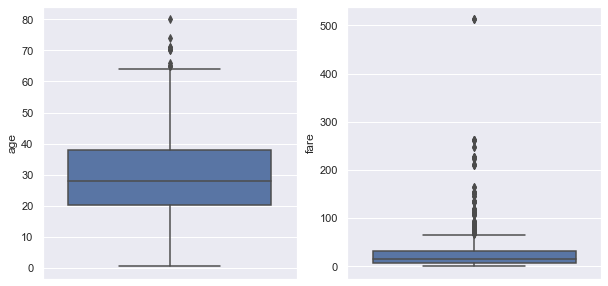

In [202]:
plot_outliers(df)

## Prétementement  sur les données 

In [204]:
df = df.drop(columns=["deck"]) 

In [213]:
df.loc[df.loc[:, "age"].isnull(), "age" ] = df.age.mean()

In [232]:
df.dropna(inplace= True )

In [218]:
df.isnull().sum().sum()

4

In [235]:
df.isnull().sum().sum()

0